# <font color='red'>Credit Card Fraud Detection</font>



In [186]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

# <font color='green'>Step1:Data Preparation</font>

## <font color='orange'>Exploratory data analysis</font>

In [187]:
#Check the data
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [188]:
#Get the shape of data
df.shape

(284807, 31)

In [189]:
#Get the information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [190]:
#Describe the data
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## <font color='orange'>Checking Missing Value</font>

In [191]:
df.isnull().sum().sum()

0

##### <font color='red'>Observation:</font>
We can see there is no missing value in the data 

## <font color='orange'>View Class Distribution</font>

In [192]:
#View Class distribution
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100
normal_share, fraud_share

(99.82725143693798, 0.1727485630620034)

##### <font color='red'>Observation:</font>
We can see it is highly imbalanced data with more than 99 percent of data as normal transaction and only 0.17 percent as fraud 

In [193]:
#Value count of classes
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

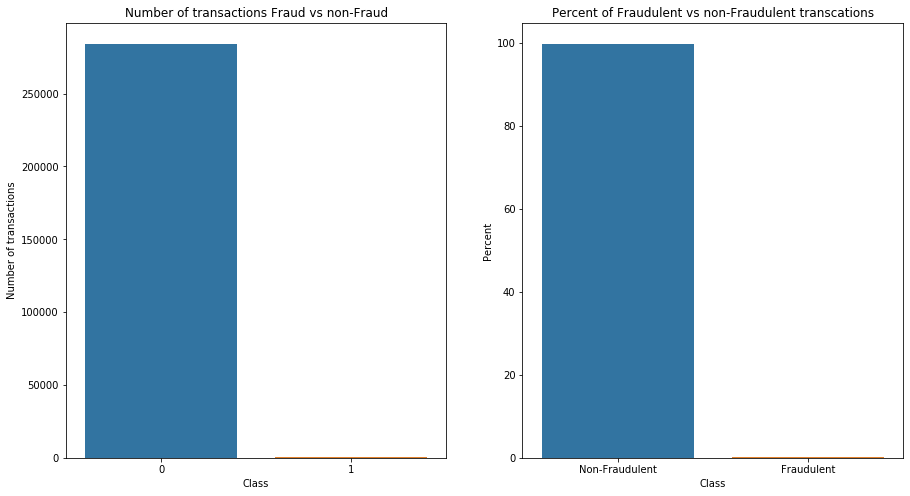

In [194]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
sns.countplot(df["Class"])
plt.ylabel("Number of transactions")
plt.xlabel("Class")
plt.title("Number of transactions Fraud vs non-Fraud")

plt.subplot(1,2,2)
fraud_percentage = {'Class':['Non-Fraudulent', 'Fraudulent'], 'Percent':[normal_share, fraud_share]} 
df_fraud_percentage = pd.DataFrame(fraud_percentage) 
sns.barplot(x='Class',y='Percent', data=df_fraud_percentage)
plt.title('Percent of Fraudulent vs non-Fraudulent transcations')

plt.show()


##### <font color='red'>Observation:</font>
We can see it is highly imbalanced data with only 492 transactions as fraud and remaining all as non-fraud

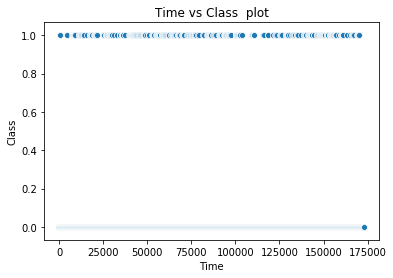

In [195]:
# Create a scatter plot to observe the distribution of classes with time
sns.scatterplot(df["Time"], df["Class"])
plt.title("Time vs Class  plot")
plt.show()

##### <font color='red'>Observation:</font>
We couldnt get much information from this plot as both the classes(Fraud,non-Fraud) are distributed over a period of time

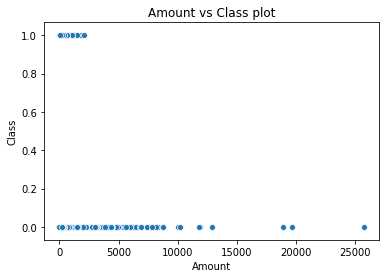

In [196]:
# Create a scatter plot to observe the distribution of classes with Amount
sns.scatterplot(df["Amount"], df["Class"])
plt.title("Amount vs Class plot")
plt.show()

##### <font color='red'>Observation:</font>
The scatter plot shows that transactions with lower amount are more likely to be fraud

## <font color='orange'>Drop Unnecessary Column</font>

In [197]:
# Drop unnecessary columns
df = df.drop("Time", axis = 1)

##### <font color='red'>Observation:</font>
Drop the column Time as it is not going to be much helpful in Model building

## <font color='orange'>Splitting the data into train and test data using stratified test-train split</font>

In [198]:
#Get dependent and independ variable
y= df["Class"]
X = df.drop("Class", axis = 1)

In [199]:
#Check the X features
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [200]:
#Check the y feature
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [201]:
#Do stratified test-train split in 80-20 ratio
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size=0.2, random_state = 42)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [202]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
394
98


## <font color='orange'>Feature Scaling</font>

In [203]:
#Since PCA is already performed on the dataset from V1 to V28 features, we need to scale only Amount field
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Scaling the train data
X_train[["Amount"]] = scaler.fit_transform(X_train[["Amount"]])

# Transform the test data
X_test[["Amount"]] = scaler.transform(X_test[["Amount"]])

In [204]:
#Get the head of training dataset
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
265518,1.946747,-0.752526,-1.355130,-0.661630,1.502822,4.024933,-1.479661,1.139880,1.406819,-0.157403,...,-0.134435,0.076197,0.297537,0.307915,0.690980,-0.350316,-0.388907,0.077641,-0.032248,-0.322494
180305,2.035149,-0.048880,-3.058693,0.247945,2.943487,3.298697,-0.002192,0.674782,0.045826,0.284864,...,-0.227279,0.038628,0.228197,0.035542,0.707090,0.512885,-0.471198,0.002520,-0.069002,-0.339764
42664,-0.991920,0.603193,0.711976,-0.992425,-0.825838,1.956261,-2.212603,-5.037523,0.000772,-2.009561,...,1.280856,-2.798352,0.109526,-0.436530,-0.932803,0.826684,0.913773,0.038049,0.185340,0.346693
198723,2.285718,-1.500239,-0.747565,-1.668119,-1.394143,-0.350339,-1.427984,0.010010,-1.118447,1.756121,...,-0.490642,-0.139670,0.077013,0.208310,-0.538236,-0.278032,-0.162068,0.018045,-0.063005,-0.327360
82325,-0.448747,-1.011440,0.115903,-3.454854,0.715771,-0.147490,0.504347,-0.113817,-0.044782,-0.558955,...,-0.275297,-0.243245,-0.173298,-0.006692,-1.362383,-0.292234,-0.144622,-0.032580,-0.064194,-0.008281


In [205]:
#Get the head of test dataset
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
263020,-0.674466,1.408105,-1.110622,-1.328366,1.388996,-1.308439,1.885879,-0.614233,0.311652,0.650757,...,0.394322,0.080084,0.810034,-0.224327,0.707899,-0.135837,0.045102,0.533837,0.291319,-0.259954
11378,-2.829816,-2.765149,2.537793,-1.074580,2.842559,-2.153536,-1.795519,-0.250020,3.073504,-1.000418,...,-0.515765,-0.295555,0.109305,-0.813272,0.042996,-0.027660,-0.910247,0.110802,-0.511938,-0.304426
147283,-3.576495,2.318422,1.306985,3.263665,1.127818,2.865246,1.444125,-0.718922,1.874046,7.398491,...,2.034786,-1.060151,0.016867,-0.132058,-1.483996,-0.296011,0.062823,0.552411,0.509764,-0.048286
219439,2.060386,-0.015382,-1.082544,0.386019,-0.024331,-1.074935,0.207792,-0.338140,0.455091,0.047859,...,-0.192024,-0.281684,-0.639426,0.331818,-0.067584,-0.283675,0.203529,-0.063621,-0.060077,-0.347741
36939,1.209965,1.384303,-1.343531,1.763636,0.662351,-2.113384,0.854039,-0.475963,-0.629658,-1.579654,...,0.009083,-0.164015,-0.328294,-0.154631,0.619449,0.818998,-0.330525,0.046884,0.104527,-0.345707


## <font color='orange'>Skewness check and handling</font>

### Plotting the distribution of a variable

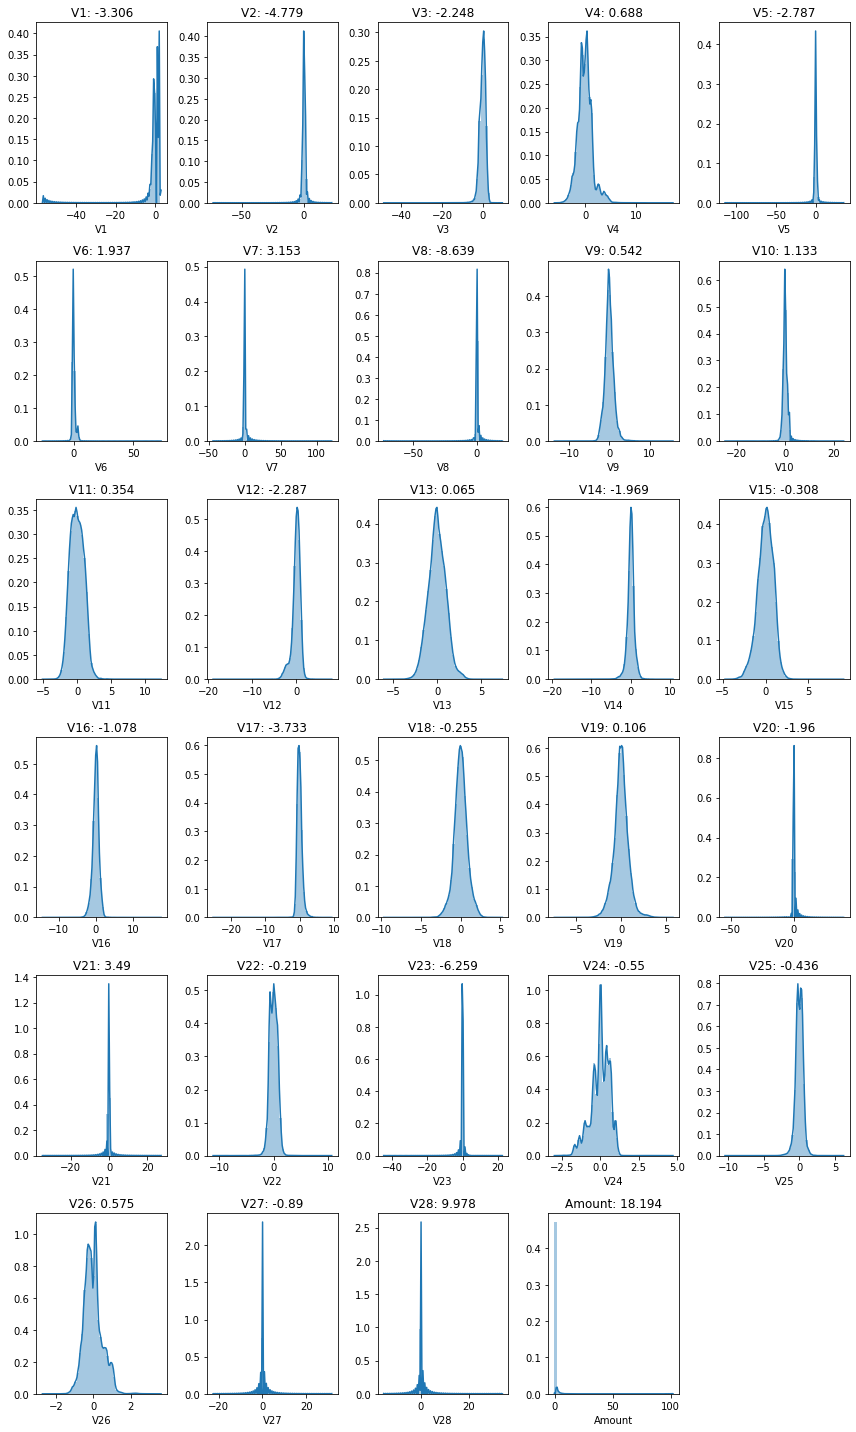

In [206]:
# plot the histogram of a variable from the dataset to see the skewness
cols = X_train.columns
i=0 
plt.figure(figsize=(12, 20))
for col in cols:
  i=i+1
  plt.subplot(6, 5, i)
  sns.distplot(X_train[col])
  plt.tight_layout()
  plt.title(col + ': ' + str(round(X_train[col].skew(), 3)))

##### <font color='red'>Observation:</font>
1.Many variables are heavily skewed

2.We used skew() function to check the skewness and will handle skewness.

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [207]:
#Apply:preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
# Import PowerTransformer
from sklearn.preprocessing import PowerTransformer 

# Instantiate the powertransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)

# Fit, transform the Power Transformer on training data
X_train[cols] = pt.fit_transform(X_train)

# Transform the test set
X_test = pt.transform(X_test)

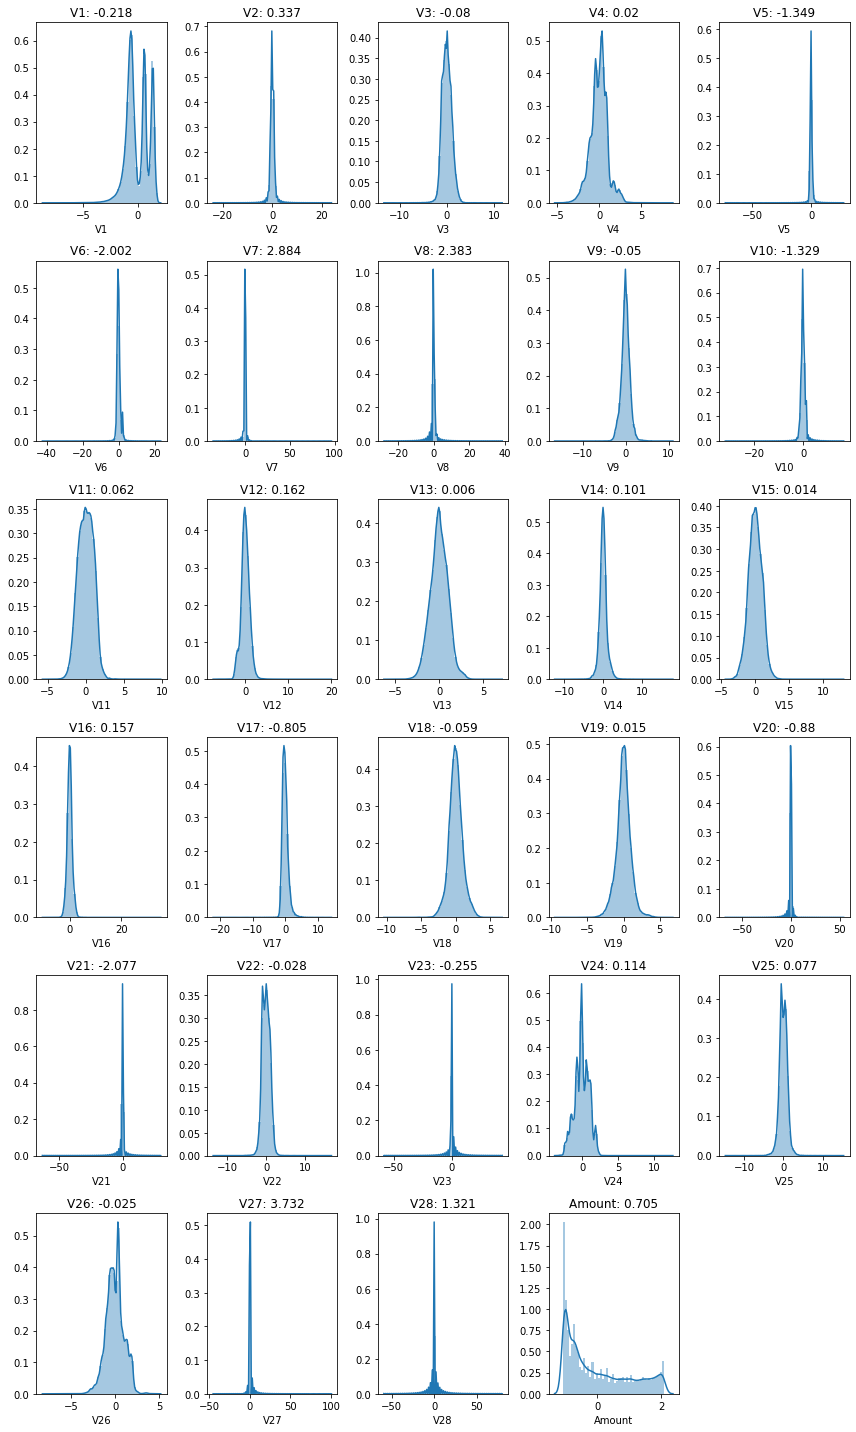

In [208]:
#Plot the histogram of the variable from the dataset again to see the result 

i=0 
plt.figure(figsize=(12, 20))
for col in cols:
  i=i+1
  plt.subplot(6, 5, i)
  sns.distplot(X_train[col])
  plt.tight_layout()
  plt.title(col + ': ' + str(round(X_train[col].skew(), 3)))

##### <font color='red'>Observation:</font>
All the variables seem to be Normaly distributed now after handling skewness

# <font color='green'>Step2-3:Model Building and Evaluation</font>

# <font color='green'>Step2-3a:Model Building and Evaluation with Imbalanced Dataset</font>

#### <font color='red'>Why SVM was skipped for Model Building--</font>

1.SVM is not very efficient with large dataset.

2.With K-Fold Cross-validation it takes large computational power.

#### <font color='red'>Why KNN was skipped for Model Building--</font>

1.KNN is not memory efficient.

2.For single datapoint, the algorithm has to calculate its distance from all the datapoint which makes it computationaly inefficient. 

#### <font color='red'>Choice of Metrics</font>

1.The dataset is heavily imbalanced with only 0.17% percent of transactions being fraudulent. Accuracy will not be the right metrics because even if we predict all transactions as non-fraudlent still accuracy will be more than 99 percent.

2.In such cases ROC curve is used to evaluate performance of the model at all classification thresholds.

3.0.5 is not the ideal threshold. We have to find the threshold at which TPR is high and FPR is low.

In [209]:
# importing metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [210]:
# Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [211]:
# Function to display F1 score and classification report
def display_scores(y_test, y_pred):
    '''
        Classification Report of the model.
    '''
    print(f"Classification Report: \n {classification_report(y_test, y_pred)}")

In [212]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

## <font color='orange'>1.Logistic Regression with imbalanced dataset</font>

#### <font color='red'>Hyperparameter Tuning using GridSearchCV</font>

In [213]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

In [214]:
# Creating KFold with 5 splits
folds = KFold(n_splits=5, random_state=42, shuffle=True)

# specify params
params = {'C': [0.01, 0.1, 1, 10, 100, 1000]}

# Scoring set to ROC-AUC
model_cv = GridSearchCV(estimator = LogisticRegression(), 
                        param_grid = params, 
                        scoring ='roc_auc', 
                        cv=folds, 
                        verbose=1, 
                        return_train_score=True)

In [215]:
#Fitting the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [216]:
# Print the result of GridSearchCV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results[['params', 'mean_test_score', 'std_test_score', 'rank_test_score', 'mean_fit_time', 'mean_score_time', 'mean_train_score']]

,params,mean_test_score,std_test_score,rank_test_score,mean_fit_time,mean_score_time,mean_train_score
0,{'C': 0.01},0.980593,0.012392,2,1.013204,0.021912,0.984999
1,{'C': 0.1},0.980897,0.012705,1,1.669280,0.024685,0.984451
2,{'C': 1},0.980554,0.013009,3,1.982707,0.024806,0.984051
3,{'C': 10},0.980499,0.013056,4,1.617888,0.021204,0.983998
4,{'C': 100},0.980494,0.013061,5,1.570920,0.020202,0.983993
5,{'C': 1000},0.980493,0.013061,6,1.502433,0.018003,0.983993


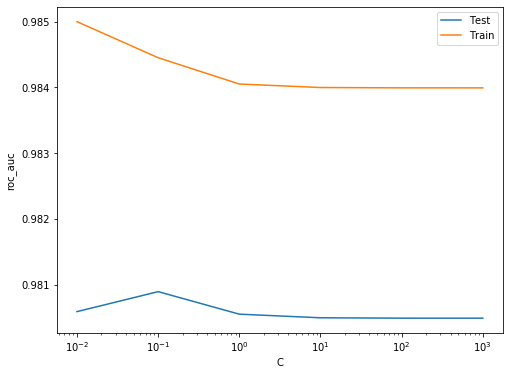

In [217]:
# Plot C vs. train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['Test', 'Train'], loc='upper right')
plt.xscale('log')

In [218]:
#Get the best score and optimal value of hyperparameter
print(f"Best Score:", model_cv.best_score_)
print(f"Best Hyperparameter-C:", model_cv.best_params_['C'])

Best Score: 0.9808965762115303
Best Hyperparameter-C: 0.1


#### <font color='red'>Logistic regression with optimal C</font>

In [219]:
#Logistic Regression with optimal C
logistic_imbalanced= LogisticRegression(C=0.1) 
# Fitting the model on train dataset
logistic_imbalanced.fit(X_train, y_train)

LogisticRegression(C=0.1)

#### <font color='red'>Prediction and evaluation on training set</font>

In [220]:
# Predictions on the train set
y_train_pred = logistic_imbalanced.predict(X_train)

In [221]:
#Display the scores
display_scores(y_train, y_train_pred)

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.90      0.65      0.76       394

    accuracy                           1.00    227845
   macro avg       0.95      0.83      0.88    227845
weighted avg       1.00      1.00      1.00    227845



In [222]:
# Predicted probability
y_train_pred_proba = logistic_imbalanced.predict_proba(X_train)[:,1]
y_train_pred_proba

array([8.42338537e-05, 2.87218156e-04, 1.93413260e-05, ...,
       4.79674530e-04, 1.67531050e-05, 1.42315319e-04])

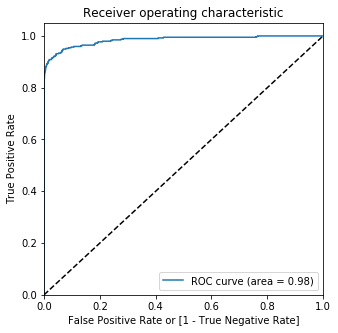

In [223]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

##### <font color='red'>Observation:</font>
We achieved a ROC of 0.98 on the training set

#### <font color='red'>Prediction and evaluation on test set</font>

In [224]:
# Predictions on the test set
y_test_pred = logistic_imbalanced.predict(X_test)

In [225]:
#Display the scores
display_scores(y_test, y_test_pred)

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.82      0.67      0.74        98

    accuracy                           1.00     56962
   macro avg       0.91      0.84      0.87     56962
weighted avg       1.00      1.00      1.00     56962



In [226]:
# Predicted probability
y_test_pred_proba = logistic_imbalanced.predict_proba(X_test)[:,1]
y_test_pred_proba

array([1.24702211e-04, 6.94467829e-05, 7.65463975e-04, ...,
       2.83761206e-06, 8.67245110e-05, 5.42397270e-04])

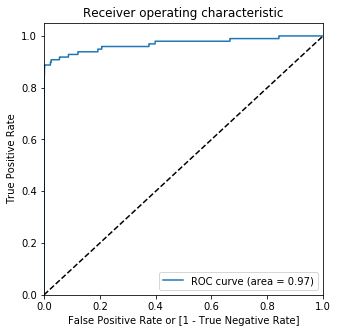

In [227]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

##### <font color='red'>Observation:</font>
We achieved a ROC of 0.97 on the test set

## <font color='blue'>Summary:Logistic Regression with imbalanced dataset<font>

Training set

- ROC : 0.98

- Recall(class-1): 0.65


Test set

- ROC : 0.97

- Recall(class-1): 0.67

## <font color='orange'>2.Decision Tree with imbalanced dataset</font>

#### <font color='red'>Hyperparameter Tuning using GridSearchCV</font>

In [228]:
#Import Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [229]:
#Define the parameters
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


#Instantiate DecionTree classifier
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           n_jobs=-1,
                           verbose = 1)

In [230]:
#Fit the training data
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [231]:
#Print the cross-validation results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,9.762415,0.502719,0.069002,0.015123,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.901295,0.934344,0.944461,0.926700,0.018433,6
1,8.844895,0.774244,0.063330,0.008184,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.901305,0.934351,0.944463,0.926706,0.018430,5
2,8.697174,0.681259,0.077344,0.031194,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.928512,0.934740,0.944521,0.935924,0.006589,1
3,9.815271,1.026969,0.115662,0.056488,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.928512,0.934740,0.944521,0.935924,0.006589,1
4,19.043213,2.127455,0.090667,0.039932,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.902169,0.939732,0.935491,0.925797,0.016797,7
5,20.227622,0.963044,0.060663,0.002494,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.909596,0.939804,0.927989,0.925796,0.012429,8
6,20.439618,1.723238,0.052663,0.006802,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.899728,0.933462,0.956765,0.929985,0.023415,3
7,16.488104,0.922799,0.039939,0.005278,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.914516,0.933499,0.934451,0.927489,0.009181,4


In [232]:
# Print optimal score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.9359244925074665
DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=50)


#### <font color='red'>Decision Tree with optimal hyperparameters</font>

In [233]:
#Logistic Regression with optimal C
decisiontree_imbalanced= DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 42,
                                  max_depth=5, 
                                  min_samples_leaf=100,
                                  min_samples_split=50)
# Fitting the model on train dataset
decisiontree_imbalanced.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=50,
                       random_state=42)

#### <font color='red'>Prediction and evaluation on training set</font>

In [234]:
# Predictions on the train set
y_train_pred = decisiontree_imbalanced.predict(X_train)

In [235]:
#Display the scores
display_scores(y_train, y_train_pred)

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.88      0.56      0.68       394

    accuracy                           1.00    227845
   macro avg       0.94      0.78      0.84    227845
weighted avg       1.00      1.00      1.00    227845



In [236]:
# Predicted probability
y_train_pred_proba = decisiontree_imbalanced.predict_proba(X_train)[:,1]
y_train_pred_proba

array([0.00020365, 0.00020365, 0.00020365, ..., 0.00020365, 0.00020365,
       0.00020365])

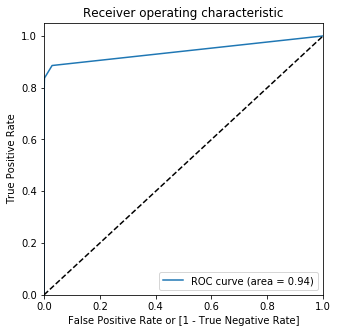

In [237]:
#Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

##### <font color='red'>Observation:</font>
We achieved a ROC of 0.94 on the training set

#### <font color='red'>Prediction and evaluation on test set</font>

In [238]:
# Predictions on the train set
y_test_pred = decisiontree_imbalanced.predict(X_test)

In [239]:
#Display the scores
display_scores(y_test, y_test_pred)

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.78      0.51      0.62        98

    accuracy                           1.00     56962
   macro avg       0.89      0.75      0.81     56962
weighted avg       1.00      1.00      1.00     56962



In [240]:
# Predicted probability
y_test_pred_proba = decisiontree_imbalanced.predict_proba(X_test)[:,1]
y_test_pred_proba

array([0.00020365, 0.00020365, 0.00306254, ..., 0.00020365, 0.00020365,
       0.00020365])

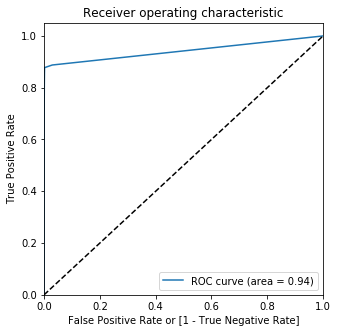

In [241]:
#Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

##### <font color='red'>Observation:</font>
We achieved a ROC of 0.94 on the test set

## <font color='blue'>Summary:Decision Tree with imbalanced dataset<font>

Training set

- ROC : 0.94

- Recall(class-1): 0.56

Test set

- ROC : 0.94

- Recall(class-1): 0.51

## <font color='orange'>3.XGBoost with imbalanced dataset</font>

#### <font color='red'>Hyperparameter Tuning using GridSearchCV</font>

In [60]:
#Import XGBoost Classifier
import xgboost as xgb
from xgboost import XGBClassifier

In [86]:
#Define number of folds
folds = 3

#Define range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6],
               'subsample': [0.3, 0.6, 0.9]}

#Get object of XGBClassifier
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

#Setting GridSearchCV()
grid_search = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)

In [87]:
#Fit the model in training set
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3, estimator=XGBClassifier(max_depth=2, n_estimators=200),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [88]:
#Print the cross-validation results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,38.224654,1.748142,0.380967,0.003325,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.978261,0.972478,0.988695,0.979811,0.006710,3,0.999823,0.999889,0.999459,0.999724,0.000189
1,50.899551,2.432455,0.421111,0.033277,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.977487,0.978889,0.986185,0.980854,0.003813,2,0.999971,0.999945,0.999898,0.999938,0.000030
2,62.540678,6.002213,0.467151,0.070059,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.975174,0.981514,0.992050,0.982912,0.006960,1,0.999961,0.999819,0.999896,0.999892,0.000058
3,39.327404,1.180161,0.487912,0.061706,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.974969,0.949984,0.972866,0.965940,0.011315,6,0.999958,0.999996,0.999952,0.999968,0.000020
4,55.787256,2.648703,0.448996,0.017446,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.979368,0.962754,0.985958,0.976027,0.009763,4,1.000000,1.000000,1.000000,1.000000,0.000000
5,52.411752,1.138708,0.442113,0.056515,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.966135,0.975996,0.984230,0.975454,0.007397,5,1.000000,1.000000,1.000000,1.000000,0.000000


In [89]:
# Print optimal score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.98291245842944
XGBClassifier(learning_rate=0.2, max_depth=2, n_estimators=200, subsample=0.9)


In [28]:
column_names = X_test.dtype.names
X_test= pd.DataFrame(X_test,columns=column_names)

In [29]:
#Conversion to numpy array for XGBoost to work
train_X= X_train.values
test_X= X_test.values

#### <font color='red'>XGBoost with optimal hyperparameters</font>

In [32]:
#Setting best parameters
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
          'objective':'binary:logistic'}

In [33]:
# fit model on training data
xgb_imbalanced = XGBClassifier(params = params)
xgb_imbalanced.fit(train_X, y_train)

XGBClassifier(params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9})

#### <font color='red'>Prediction and evaluation on training set</font>

In [127]:
# Predictions on the train set
y_train_pred = xgb_imbalanced.predict(train_X)

In [128]:
#Display the scores
display_scores(y_train, y_train_pred)

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.97      0.83      0.90       394

    accuracy                           1.00    227845
   macro avg       0.99      0.92      0.95    227845
weighted avg       1.00      1.00      1.00    227845



In [37]:
# Predicted probability
y_train_pred_proba = xgb_imbalanced.predict_proba(train_X)[:,1]
y_train_pred_proba

array([4.6706988e-05, 1.2956583e-04, 1.6781813e-04, ..., 1.4274349e-04,
       1.3097121e-04, 8.3302388e-05], dtype=float32)

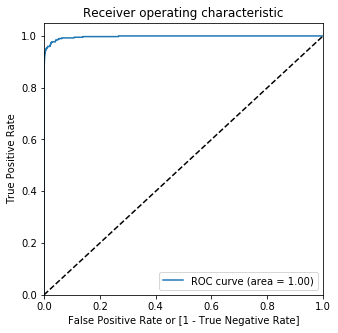

In [40]:
#Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

##### <font color='red'>Observation:</font>
We achieved a ROC of 1.0 on the training set

#### <font color='red'>Prediction and evaluation on test set</font>

In [129]:
# Predictions on the train set
y_test_pred = xgb_imbalanced.predict(test_X)

In [130]:
#Display the scores
display_scores(y_test, y_test_pred)

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.89      0.81      0.84        98

    accuracy                           1.00     56962
   macro avg       0.94      0.90      0.92     56962
weighted avg       1.00      1.00      1.00     56962



In [45]:
# Predicted probability
y_test_pred_proba = xgb_imbalanced.predict_proba(test_X)[:,1]
y_test_pred_proba

array([1.2535592e-04, 6.6070541e-05, 3.7067086e-03, ..., 1.5400260e-04,
       6.6796354e-05, 1.5364295e-04], dtype=float32)

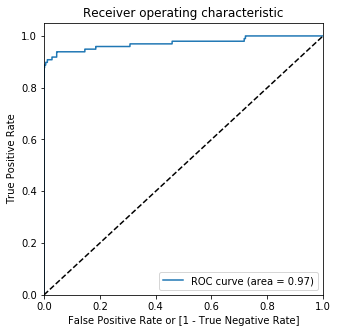

In [46]:
#Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

##### <font color='red'>Observation:</font>
We achieved a ROC of 0.97 on the test set

## <font color='blue'>Summary:XGBoost with imbalanced dataset<font>

Training set

- ROC : 1.0

- Recall(class-1): 0.83


Test set

- ROC : 0.97

- Recall(class-1): 0.81

## <font color='purple'>Choosing best model on imbalanced data<font>


- Logistic Regression and XGBoost performed best in terms of ROC-AUC score in test data(0.97), though XGBoost had the best Recall for Fraudulent class(0.81)


- XGBoost also had minimum overfitting as the metrics are almost similar in Training and Test data.


- We can select <font color='red'>XGBoost as the best performing model in imbalanced dataset</font> because together with best ROC in testset(0.97) it has best Recall(0.81) and F1 score(0.84) for the Fraudlent cases.

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 17
2nd Top var = 14
3rd Top var = 10


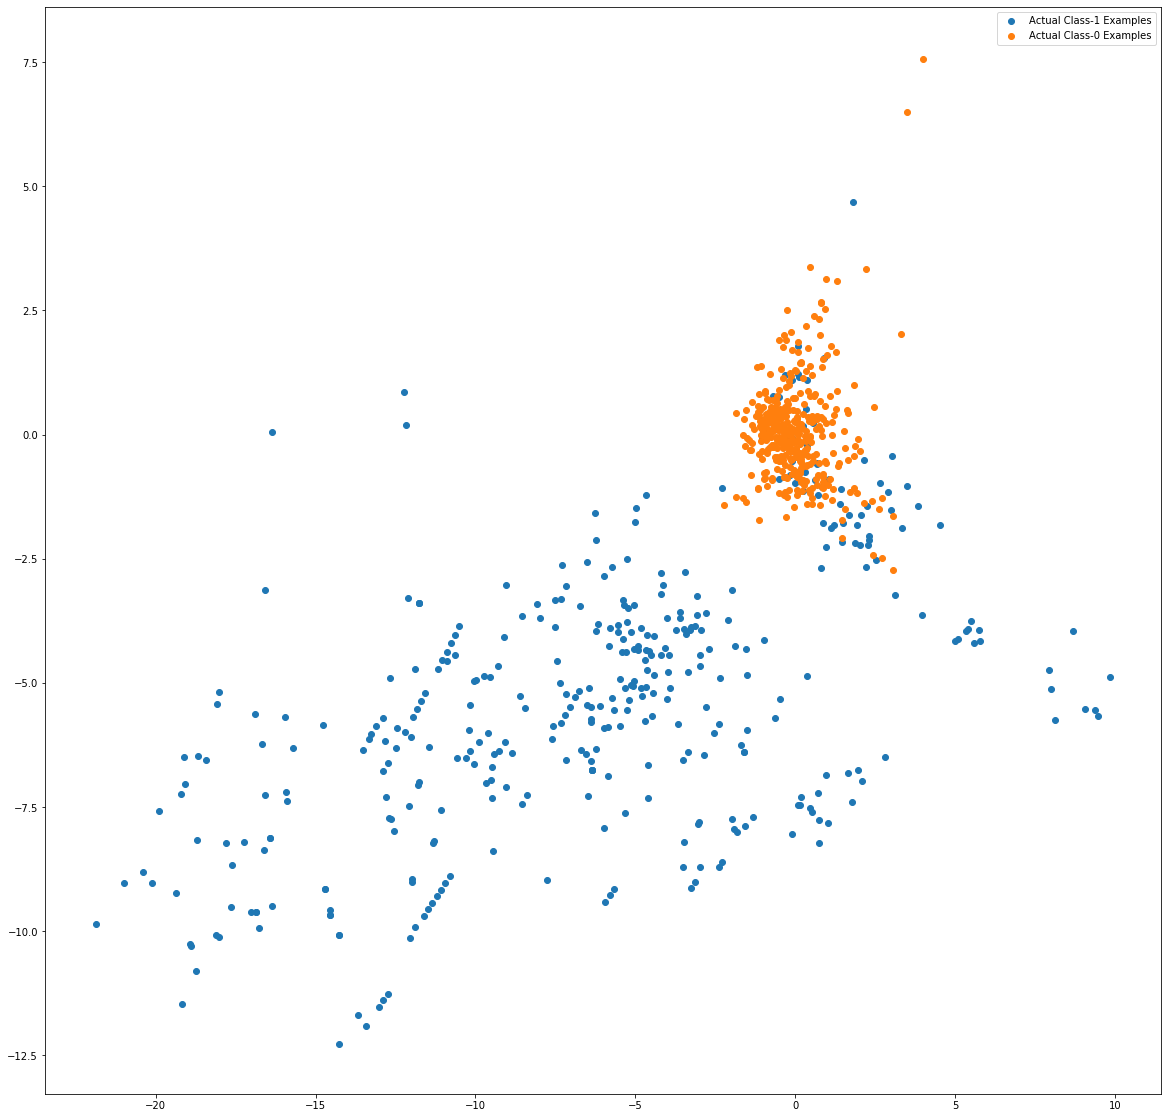

In [47]:
var_imp = []
for i in xgb_imbalanced.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgb_imbalanced.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgb_imbalanced.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgb_imbalanced.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgb_imbalanced.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb_imbalanced.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Print the FPR,TPR & select the best threshold from the roc curve for the best model

In [48]:
print('Train auc =', metrics.roc_auc_score(y_train, y_train_pred_proba))
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_pred_proba)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold=",threshold)

Train auc = 0.9972538515407803
Threshold= 0.0016365804


##### <font color='red'>Observation:</font>
We see that at threshold of 0.0016 TPR is highest and FPR is lowest and we get the best ROC score of 0.997.

# <font color='green'>Step2-3b:Model Building and Evaluation after balancing Classes</font>

## <font color='red'>Method1:Random Oversampling</font>

In [49]:
#Do the necessary import
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [51]:
#Define strategy for oversampling 
oversample = RandomOverSampler(sampling_strategy='minority')
# Fit and  transform
X_over, y_over = oversample.fit_resample(X_train, y_train)

In [52]:
# Before sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# After sampling class distribution 
print('After sampling class distribution:-',Counter(y_over))

Before sampling class distribution:- Counter({0: 227451, 1: 394})
After sampling class distribution:- Counter({0: 227451, 1: 227451})


## <font color='orange'>1.Logistic Regression with data balanced by Random Oversampling</font>

#### <font color='red'>Hyperparameter Tuning using GridSearchCV</font>

In [61]:
#KFold  with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Setting Grid search CV
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit  model
model_cv.fit(X_over, y_over)

#Best ROC-AUC
print('Best ROC AUC score: ', model_cv.best_score_)

#Best Hyperparameter
print('Best hyperparameters: ', model_cv.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best ROC AUC score:  0.9883423912831445
Best hyperparameters:  {'C': 100}


In [62]:
#Get the CV results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.752433,0.211031,0.048844,0.021373,0.01,{'C': 0.01},0.988376,0.988095,0.988505,0.987976,...,0.988208,0.000198,6,0.988149,0.988234,0.988124,0.988320,0.988256,0.988216,0.000071
1,3.066257,0.261977,0.037607,0.003722,0.1,{'C': 0.1},0.988489,0.988223,0.988615,0.988098,...,0.988327,0.000193,5,0.988269,0.988353,0.988247,0.988441,0.988380,0.988338,0.000072
2,2.695351,0.413024,0.036807,0.005031,1,{'C': 1},0.988500,0.988238,0.988628,0.988114,...,0.988341,0.000192,4,0.988285,0.988366,0.988260,0.988455,0.988394,0.988352,0.000071
3,2.643938,0.225589,0.037732,0.003836,10,{'C': 10},0.988501,0.988239,0.988629,0.988117,...,0.988342,0.000191,3,0.988286,0.988367,0.988262,0.988456,0.988396,0.988353,0.000071
4,2.572476,0.245925,0.039005,0.007209,100,{'C': 100},0.988501,0.988239,0.988630,0.988117,...,0.988342,0.000191,1,0.988286,0.988367,0.988261,0.988456,0.988396,0.988353,0.000072
5,2.656593,0.347044,0.036200,0.006854,1000,{'C': 1000},0.988501,0.988239,0.988630,0.988117,...,0.988342,0.000191,2,0.988286,0.988367,0.988262,0.988456,0.988396,0.988353,0.000071


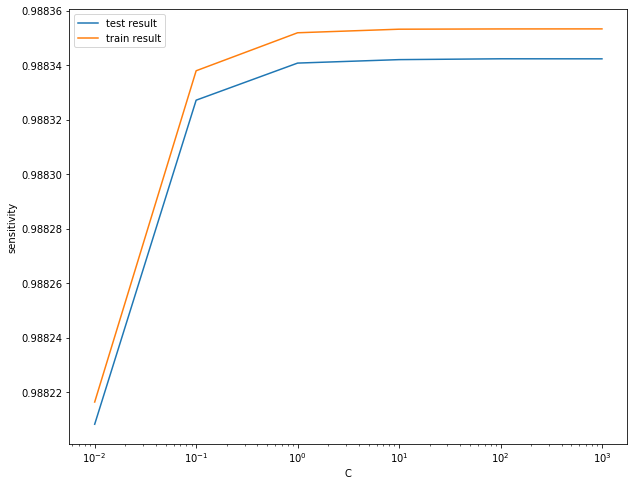

In [63]:
#Plot C vs train and validation scores
plt.figure(figsize=(10, 8))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

#### <font color='red'>Logistic Regression with hyperparameter tuning</font>

In [64]:
# Instantiating the model with best hyperparameter and fitting
logreg_oversampling = LogisticRegression(C=100).fit(X_over, y_over)

In [120]:
# Predictions on the train set
y_train_pred = logreg_oversampling.predict(X_over)

#### <font color='red'>Evaluating over training data</font>

In [121]:
#Display scores
display_scores(y_over, y_train_pred)

Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95    227451
           1       0.97      0.93      0.95    227451

    accuracy                           0.95    454902
   macro avg       0.95      0.95      0.95    454902
weighted avg       0.95      0.95      0.95    454902



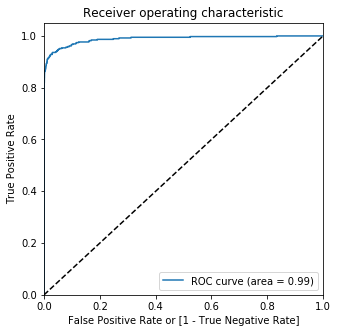

In [67]:
# Predicted 
y_train_pred_proba = logreg_oversampling.predict_proba(X_over)[:,1]
# Plot the ROC curve
draw_roc(y_over, y_train_pred_proba)

#### <font color='red'>Evaluating over test data</font>

In [122]:
# Evaluating on test data
y_test_pred = logreg_oversampling.predict(X_test)

#Display the scores
display_scores(y_test, y_test_pred)

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.05      0.92      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.54     56962
weighted avg       1.00      0.97      0.98     56962



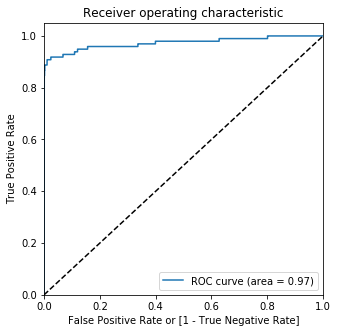

In [69]:
# Predicted
y_test_pred_proba = logreg_oversampling.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

## <font color='blue'>Summary:Logistic Regression with Random Oversampling<font>

Training set

- ROC : 0.99

- Recall(class-1): 0.93


Test set

- ROC : 0.97

- Recall(class-1): 0.92

## <font color='orange'>2.Decision Tree with data balanced by Random Oversampling</font>

#### <font color='red'>Hyperparameter Tuning using GridSearchCV</font>

In [70]:
#Set parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate Decision Tree
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_over,y_over)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [71]:
# Print optimal ROC score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.9993355953956206
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


#### <font color='red'>Decision tree with optimal hyperparameter</font>

In [72]:
# Decision tree with optimal hyperparameters
dt_oversampling = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_oversampling.fit(X_over, y_over)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

#### <font color='red'>Evaluating over training data</font>

In [118]:
# Predictions on the train set
y_train_pred = dt_oversampling.predict(X_over)
display_scores(y_over, y_train_pred)

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    227451
           1       0.99      1.00      1.00    227451

    accuracy                           1.00    454902
   macro avg       1.00      1.00      1.00    454902
weighted avg       1.00      1.00      1.00    454902



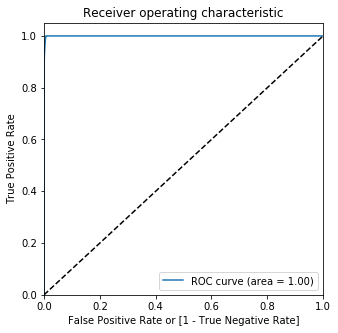

In [74]:
# Predicted
y_train_pred_proba = dt_oversampling.predict_proba(X_over)[:,1]
# Plot the ROC curve
draw_roc(y_over, y_train_pred_proba)

#### <font color='red'>Evaluating over test data</font>

In [119]:
# Evaluating on the test data
y_test_pred = dt_oversampling.predict(X_test)
display_scores(y_test, y_test_pred)

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.16      0.85      0.26        98

    accuracy                           0.99     56962
   macro avg       0.58      0.92      0.63     56962
weighted avg       1.00      0.99      0.99     56962



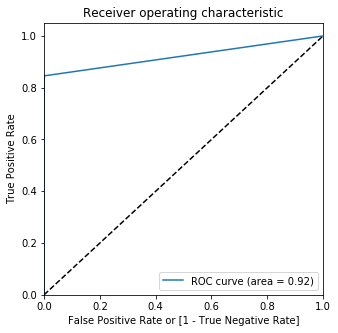

In [76]:
# Predicted probability
y_test_pred_proba = dt_oversampling.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

## <font color='blue'>Summary:Decision Tree with Random Oversampling<font>

Training set

- ROC : 1.0

- Recall(class-1): 1.0


Test set

- ROC : 0.92

- Recall(class-1): 0.85

## <font color='orange'>3.XGBoost with data balanced by Random Oversampling</font>

#### <font color='red'>Hyperparameter Tuning using GridSearchCV</font>

In [77]:
#Define number of folds
folds = 3

#hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


#XGBClassifier object
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_over, y_over) 

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3, estimator=XGBClassifier(max_depth=2, n_estimators=200),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [80]:
#Cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,80.109503,1.478574,0.693682,0.014406,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.999922,0.999858,0.999916,0.999899,0.000029,5,0.999898,0.999924,0.999912,0.999911,1.078079e-05
1,101.741174,10.294615,0.729208,0.073666,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.999931,0.999851,0.999916,0.999899,0.000035,4,0.999908,0.999926,0.999911,0.999915,8.071266e-06
2,83.662039,2.006073,0.747027,0.074061,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.999928,0.999846,0.999915,0.999896,0.000036,6,0.999898,0.999921,0.999907,0.999909,9.571400e-06
3,72.199205,1.094322,0.710519,0.027670,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.999995,0.999972,0.999968,0.999978,0.000012,3,1.000000,0.999995,0.999997,0.999998,1.985724e-06
4,95.600790,7.871893,0.724231,0.025148,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.999999,0.999972,0.999986,0.999985,0.000011,1,1.000000,1.000000,1.000000,1.000000,1.006248e-07
5,104.532388,15.991907,0.780584,0.047655,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.999996,0.999981,0.999976,0.999984,0.000009,2,1.000000,0.999999,0.999999,0.999999,4.378376e-07


In [81]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)

Best roc auc score :  0.999985230928806
XGBClassifier(learning_rate=0.6, max_depth=2, n_estimators=200, subsample=0.6)


#### <font color='red'>XGBoost with optimal hyperparameter</font>

In [90]:
#For XGBoost to work convert Dataframe to numpy array
over_X=X_over.values

In [91]:
# chosen hyperparameters
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.6,
         'objective':'binary:logistic'}

# fit model on training data
xgb_oversampling = XGBClassifier(params = params)
xgb_oversampling.fit(over_X, y_over)

XGBClassifier(params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.6})

#### <font color='red'>Evaluating over training data</font>

In [123]:
# Predictions on the train set
y_train_pred = xgb_oversampling.predict(over_X)

display_scores(y_over, y_train_pred)

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    227451
           1       0.99      1.00      1.00    227451

    accuracy                           1.00    454902
   macro avg       1.00      1.00      1.00    454902
weighted avg       1.00      1.00      1.00    454902



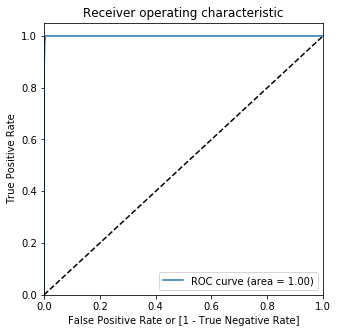

In [93]:
# Predicted
y_train_pred_proba = xgb_oversampling.predict_proba(over_X)[:,1]

# Plot the ROC curve
draw_roc(y_over, y_train_pred_proba)

#### <font color='red'>Evaluating over test data</font>

In [124]:
y_pred = xgb_oversampling.predict(test_X)
display_scores(y_test, y_pred)

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.19      0.90      0.31        98

    accuracy                           0.99     56962
   macro avg       0.59      0.95      0.65     56962
weighted avg       1.00      0.99      1.00     56962



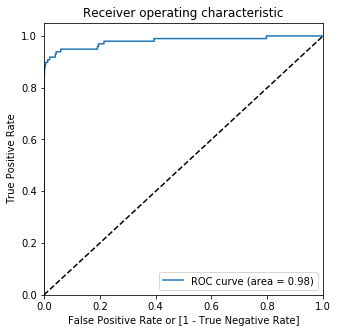

In [104]:
# Predicted
y_test_pred_proba = xgb_oversampling.predict_proba(test_X)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

## <font color='blue'>Summary:XGBoost with Random Oversampling<font>

Training set

- ROC : 1.0

- Recall(class-1): 1.0


Test set

- ROC : 0.98

- Recall(class-1): 0.90

## <font color='red'>Method2:Synthetic Minority Oversampling Technique(SMOTE)</font>

In [105]:
#import library
from imblearn.over_sampling import SMOTE

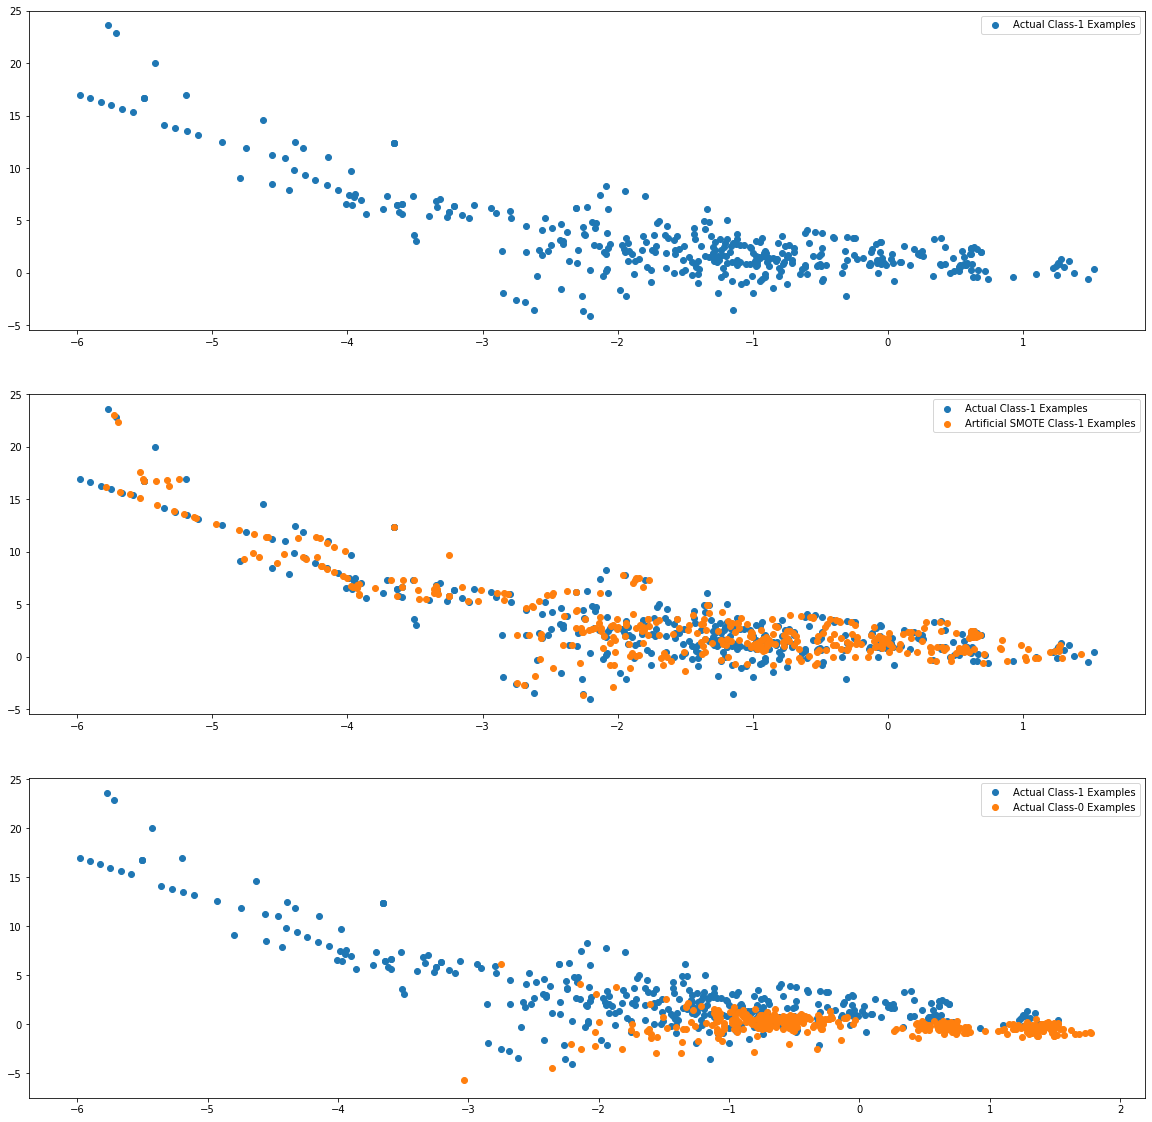

In [106]:
sm = SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1.iloc[:X_train_1.shape[0], 0], X_train_smote_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

## <font color='orange'>1.Logistic Regression with data balanced by SMOTE</font>

#### <font color='red'>Hyperparameter Tuning using GridSearchCV</font>

In [107]:
#Define KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Define parameters
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

#Define Gridsearch 
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_smote, y_train_smote)

#Print ROC-AUC
print('Best ROC AUC score: ', model_cv.best_score_)

#Print best value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best ROC AUC score:  0.9904411139212712
Best hyperparameters:  {'C': 1000}


In [108]:
#Cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.872577,0.491691,0.048398,0.011501,0.01,{'C': 0.01},0.990239,0.990122,0.990773,0.990088,...,0.990324,0.000249,6,0.990325,0.990361,0.990224,0.990433,0.990336,0.990336,0.000067
1,2.753097,0.203013,0.042397,0.005537,0.1,{'C': 0.1},0.990327,0.990240,0.990874,0.990195,...,0.990429,0.000247,5,0.990431,0.990463,0.990331,0.990539,0.990439,0.990440,0.000067
2,2.578369,0.289679,0.040311,0.002084,1,{'C': 1},0.990336,0.990253,0.990885,0.990207,...,0.990440,0.000247,4,0.990442,0.990474,0.990342,0.990550,0.990449,0.990452,0.000067
3,2.665494,0.309284,0.045600,0.013049,10,{'C': 10},0.990337,0.990254,0.990886,0.990208,...,0.990441,0.000247,3,0.990443,0.990475,0.990344,0.990551,0.990451,0.990453,0.000067
4,2.956668,0.425253,0.041195,0.005946,100,{'C': 100},0.990337,0.990254,0.990886,0.990208,...,0.990441,0.000247,2,0.990443,0.990475,0.990344,0.990551,0.990451,0.990453,0.000067
5,2.467019,0.206277,0.042239,0.003966,1000,{'C': 1000},0.990337,0.990255,0.990886,0.990208,...,0.990441,0.000247,1,0.990443,0.990476,0.990344,0.990551,0.990451,0.990453,0.000067


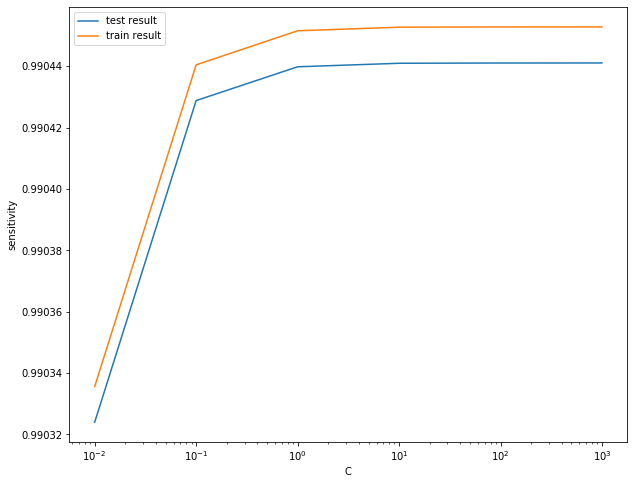

In [109]:
#Plot C vs.train and validation scores

plt.figure(figsize=(10, 8))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

#### <font color='red'>Logistic regression with optimal hyperparameter</font>

In [110]:
# Instantiate the model
logreg_smote = LogisticRegression(C=1000)

# Fitting the model with balanced data
logreg_smote.fit(X_train_smote, y_train_smote)

LogisticRegression(C=1000)

#### <font color='red'>Evaluating over training data</font>

In [125]:
# Evaluating on training data
y_train_pred = logreg_smote.predict(X_train_smote)
display_scores(y_train_smote, y_train_pred)

Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95    227451
           1       0.97      0.93      0.95    227451

    accuracy                           0.95    454902
   macro avg       0.95      0.95      0.95    454902
weighted avg       0.95      0.95      0.95    454902



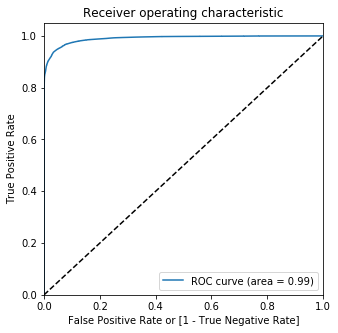

In [112]:
# Predicted
y_train_pred_proba_smote = logreg_smote.predict_proba(X_train_smote)[:,1]
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba_smote)

#### <font color='red'>Evaluating over test data</font>

In [126]:
# Evaluating on test data
y_test_pred = logreg_smote.predict(X_test)
display_scores(y_test, y_test_pred)

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.05      0.92      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.54     56962
weighted avg       1.00      0.97      0.98     56962



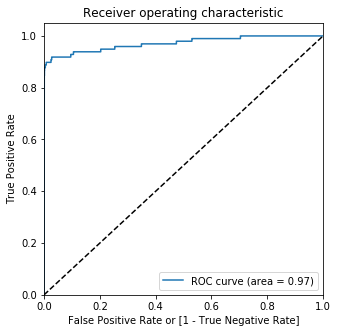

In [114]:
# Predicted
y_test_pred_proba_smote = logreg_smote.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba_smote)

## <font color='blue'>Summary:Logistic Regression with SMOTE<font>

Training set

- ROC : 0.99

- Recall(class-1): 0.93


Test set

- ROC : 0.97

- Recall(class-1): 0.92

## <font color='orange'>2.Decision Tree with data balanced by SMOTE</font>

#### <font color='red'>Hyperparameter Tuning using GridSearchCV</font>

In [133]:
#Define the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate DecionTree classifier
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search
grid_search.fit(X_train_smote,y_train_smote)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [134]:
#Print the optimal roc score and hyperparameters
print("Best ROC-AUC score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best ROC-AUC score :  0.9981088242826344
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


#### <font color='red'>Decision Tree with optimal hyperparameter</font>

In [135]:
# Model with optimal hyperparameters
dt_smote = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 42,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_smote.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=42)

#### <font color='red'>Evaluating over training data</font>

In [137]:
# Predictions on the training data
y_train_pred_smote = dt_smote.predict(X_train_smote)
display_scores(y_train_smote, y_train_pred_smote)

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99    227451
           1       0.99      0.99      0.99    227451

    accuracy                           0.99    454902
   macro avg       0.99      0.99      0.99    454902
weighted avg       0.99      0.99      0.99    454902



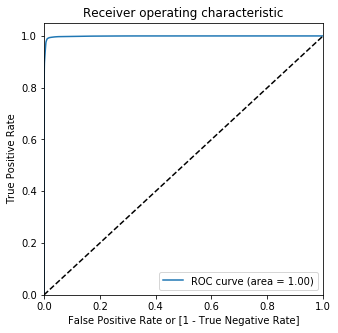

In [138]:
# Predicted
y_train_pred_proba = dt_smote.predict_proba(X_train_smote)[:,1]
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

#### <font color='red'>Evaluating over test data</font>

In [139]:
# Evaluating on the test data
y_pred = dt_smote.predict(X_test)
display_scores(y_test, y_pred)

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.10      0.88      0.18        98

    accuracy                           0.99     56962
   macro avg       0.55      0.93      0.59     56962
weighted avg       1.00      0.99      0.99     56962



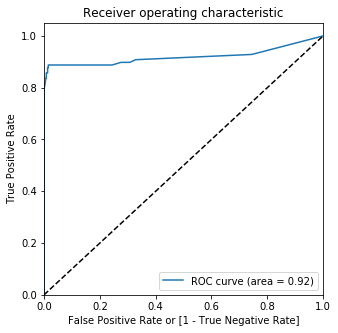

In [141]:
# Predicted
y_test_pred_smote = dt_smote.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_smote)

## <font color='blue'>Summary:Decision Tree with SMOTE<font>

Training set

- ROC : 1.0

- Recall(class-1): 0.99


Test set

- ROC : 0.92

- Recall(class-1): 0.88

## <font color='orange'>3.XGBoost with data balanced by SMOTE</font>

#### <font color='red'>Hyperparameter Tuning using GridSearchCV</font>

In [143]:
#Defining KFold
folds = 3

#Define hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

#GridSearchCV parameters
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

#Model fit
model_cv.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3, estimator=XGBClassifier(max_depth=2, n_estimators=200),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [144]:
#Display CV results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,90.370551,2.865428,0.755131,0.026329,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.999597,0.999495,0.999627,0.999573,0.000056,4,0.999599,0.999621,0.999629,0.999617,0.000013
1,118.604091,2.876417,0.740085,0.022512,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.999584,0.999487,0.999582,0.999551,0.000045,5,0.999599,0.999615,0.999578,0.999598,0.000015
2,130.866667,8.878949,0.805971,0.070037,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.999582,0.999473,0.999579,0.999544,0.000051,6,0.999597,0.999609,0.999582,0.999596,0.000011
3,92.780675,2.398346,0.844966,0.117023,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.999950,0.999891,0.999938,0.999926,0.000026,3,0.999963,0.999961,0.999960,0.999961,0.000001
4,123.547448,5.895816,0.771038,0.043903,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.999957,0.999895,0.999931,0.999928,0.000026,2,0.999966,0.999972,0.999965,0.999967,0.000003
5,137.465006,8.576791,0.769710,0.040212,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.999964,0.999906,0.999944,0.999938,0.000024,1,0.999969,0.999976,0.999972,0.999972,0.000003


In [145]:
#Printing optimal score,hyperparameters
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)

Best roc auc score :  0.999938226531266
XGBClassifier(learning_rate=0.6, max_depth=2, n_estimators=200, subsample=0.9)


#### <font color='red'>XGBoost with optimal hyperparameter</font>

In [151]:
#Define optimal hyperparameters
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

train_X_smote = X_train_smote.values
# fit model on training data
xgb_smote = XGBClassifier(params = params)
xgb_smote.fit(train_X_smote, y_train_smote)

XGBClassifier(params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9})

#### <font color='red'>Evaluating over training data</font>

In [152]:
y_train_pred = xgb_smote.predict(train_X_smote)
display_scores(y_train_smote, y_train_pred)

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98    227451
           1       0.99      0.97      0.98    227451

    accuracy                           0.98    454902
   macro avg       0.98      0.98      0.98    454902
weighted avg       0.98      0.98      0.98    454902



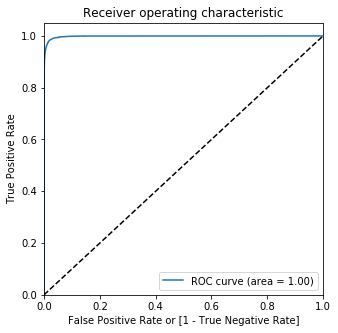

In [153]:
# Predicted
y_train_pred_proba = xgb_smote.predict_proba(train_X_smote)[:,1]
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

#### <font color='red'>Evaluating over test data</font>

In [154]:
y_pred = xgb_smote.predict(test_X)
display_scores(y_test, y_pred)

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.11      0.91      0.20        98

    accuracy                           0.99     56962
   macro avg       0.56      0.95      0.60     56962
weighted avg       1.00      0.99      0.99     56962



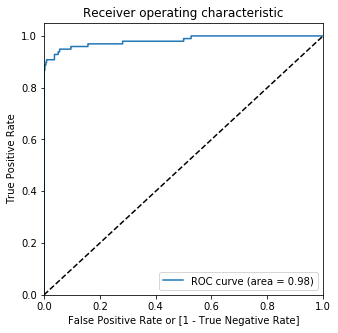

In [155]:
# Predicted
y_test_pred_proba = xgb_smote.predict_proba(test_X)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

## <font color='blue'>Summary:XGBoost with SMOTE<font>

Training set

- ROC : 1.0

- Recall(class-1): 0.97


Test set

- ROC : 0.98

- Recall(class-1): 0.91

## <font color='red'>Method3:Adaptive Synthetic Sampling(ADASYN)</font>

### Print the class distribution after applying ADASYN

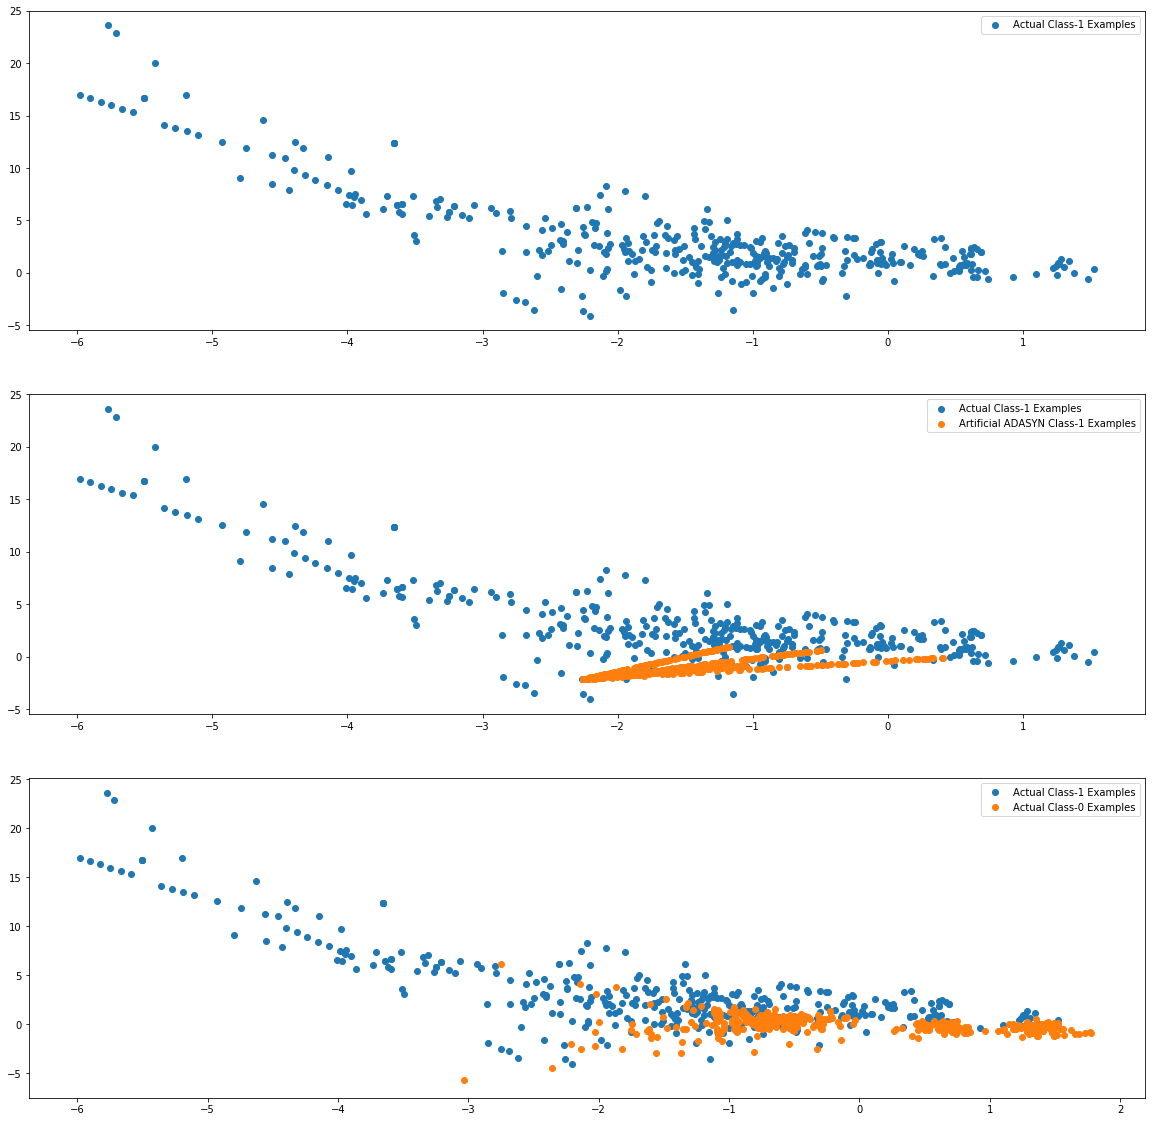

In [157]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1.iloc[:X_train_1.shape[0], 0], X_train_adasyn_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

## <font color='orange'>1.Logistic Regression with data balanced by ADASYN</font>

#### <font color='red'>Hyperparameter Tuning using GridSearchCV</font>

In [158]:
#Define Kfolds
folds = KFold(n_splits=3, shuffle=True, random_state=4)

#Define parameters
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

#Set GridSearchCV
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn)

#Print best ROC-AUC
print('Best ROC AUC score: ', model_cv.best_score_)

#Print best hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best ROC AUC score:  0.9674185387401334
Best hyperparameters:  {'C': 1000}


In [159]:
#Cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,2.116512,0.134769,0.079206,0.011312,0.01,{'C': 0.01},0.966853,0.967309,0.967307,0.967156,0.000215,6,0.967198,0.967121,0.967267,0.967196,0.000060
1,2.143874,0.150950,0.067221,0.005607,0.1,{'C': 0.1},0.967079,0.967548,0.967560,0.967396,0.000224,5,0.967446,0.967360,0.967500,0.967436,0.000058
2,2.081580,0.077104,0.068673,0.006801,1,{'C': 1},0.967098,0.967569,0.967582,0.967416,0.000225,4,0.967468,0.967382,0.967520,0.967457,0.000057
3,2.230310,0.078359,0.065664,0.010336,10,{'C': 10},0.967099,0.967571,0.967584,0.967418,0.000226,3,0.967470,0.967384,0.967522,0.967459,0.000057
4,2.101935,0.045398,0.070610,0.003320,100,{'C': 100},0.967100,0.967572,0.967584,0.967419,0.000226,2,0.967470,0.967384,0.967522,0.967459,0.000057
5,2.264349,0.091014,0.069336,0.000465,1000,{'C': 1000},0.967100,0.967572,0.967584,0.967419,0.000226,1,0.967470,0.967384,0.967522,0.967459,0.000057


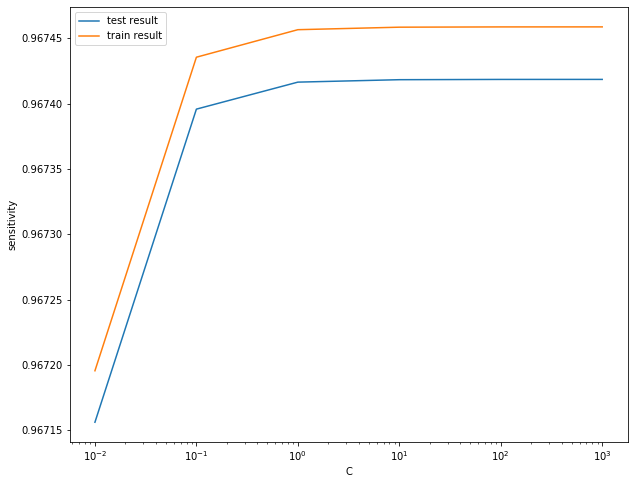

In [160]:
#Plot of C vs. train and validation scores
plt.figure(figsize=(10, 8))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

#### <font color='red'>Logistic Regression with optimal hyperparameter</font>

In [161]:
# Instantiating the Logistic Regression
logreg_adasyn = LogisticRegression(C=1000)

# Fitting the model 
logreg_adasyn.fit(X_train_adasyn, y_train_adasyn)

LogisticRegression(C=1000)

#### <font color='red'>Evaluating over training data</font>

In [162]:
# Evaluating on test data
y_train_pred = logreg_adasyn.predict(X_train_adasyn)
display_scores(y_train_adasyn, y_train_pred)

Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.91      0.90    227451
           1       0.91      0.90      0.90    227458

    accuracy                           0.90    454909
   macro avg       0.90      0.90      0.90    454909
weighted avg       0.90      0.90      0.90    454909



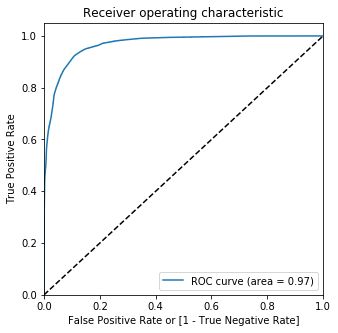

In [163]:
# Predicted
y_train_pred_proba = logreg_adasyn.predict_proba(X_train_adasyn)[:,1]
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

#### <font color='red'>Evaluating over test data</font>

In [164]:
# Evaluating on test data
y_pred = logreg_adasyn.predict(X_test)
display_scores(y_test, y_pred)

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.91      0.95     56864
           1       0.02      0.93      0.03        98

    accuracy                           0.91     56962
   macro avg       0.51      0.92      0.49     56962
weighted avg       1.00      0.91      0.95     56962



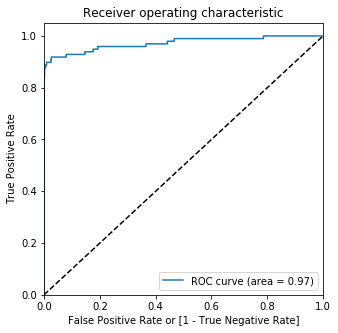

In [165]:
# Predicted
y_test_pred_proba = logreg_adasyn.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

## <font color='blue'>Summary:Logistic Regression with ADASYN<font>

Training set

- ROC : 0.97

- Recall(class-1): 0.90


Test set

- ROC : 0.97

- Recall(class-1): 0.93

## <font color='orange'>2.Decision Tree with data balanced by ADASYN</font>

#### <font color='red'>Hyperparameter Tuning using GridSearchCV</font>

In [166]:
#Define parameter grid
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate Decision Tree
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 5, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_adasyn,y_train_adasyn)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [167]:
# Printing optimal ROC-AUC and best hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.9407213604102278
DecisionTreeClassifier(max_depth=10, min_samples_leaf=100,
                       min_samples_split=100)


#### <font color='red'>Decision Tree with optimal hyperparameter</font>

In [168]:
#Decision Tree with optimal hyperparameters
dt_adasyn = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 42,
                                  max_depth=10, 
                                  min_samples_leaf=100,
                                  min_samples_split=100)

dt_adasyn.fit(X_train_adasyn, y_train_adasyn)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100,
                       min_samples_split=100, random_state=42)

#### <font color='red'>Evaluating over training data</font>

In [169]:
# Evaluating model on the training data
y_train_pred = dt_adasyn.predict(X_train_adasyn)
display_scores(y_train_adasyn, y_train_pred)

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98    227451
           1       0.97      0.99      0.98    227458

    accuracy                           0.98    454909
   macro avg       0.98      0.98      0.98    454909
weighted avg       0.98      0.98      0.98    454909



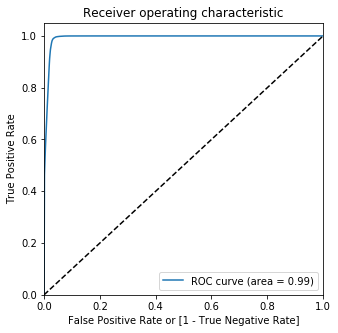

In [170]:
# Predicted
y_train_pred_proba = dt_adasyn.predict_proba(X_train_adasyn)[:,1]
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

#### <font color='red'>Evaluating over test data</font>

In [171]:
# Evaluating  on the test data
y_pred = dt_adasyn.predict(X_test)
display_scores(y_test, y_pred)

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.88      0.08        98

    accuracy                           0.96     56962
   macro avg       0.52      0.92      0.53     56962
weighted avg       1.00      0.96      0.98     56962



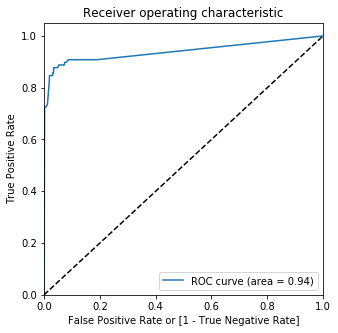

In [172]:
# Predicted
y_test_pred_proba = dt_adasyn.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

## <font color='blue'>Summary:Decision Tree with ADASYN<font>

Training set

- ROC : 0.99

- Recall(class-1): 0.99


Test set

- ROC : 0.94

- Recall(class-1): 0.88

## <font color='orange'>3.XGBoost with data balanced by ADASYN</font>

#### <font color='red'>Hyperparameter Tuning using GridSearchCV</font>

In [173]:
#Define folds 
folds = 3

#Define hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


#Create XGBClassifier object
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

#GridSearchCV parameters
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

#Fitting model
model_cv.fit(X_train_adasyn, y_train_adasyn)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3, estimator=XGBClassifier(max_depth=2, n_estimators=200),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [174]:
# Cross Validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,81.830522,2.313571,0.654088,0.055004,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.991480,0.985927,0.973886,0.983764,0.007344,6,0.999194,0.999033,0.998808,0.999012,0.000158
1,109.901643,4.883898,0.652152,0.011569,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.990826,0.984843,0.978139,0.984603,0.005182,5,0.999201,0.999089,0.998989,0.999093,0.000087
2,109.357110,2.273402,0.601161,0.030989,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.990896,0.986245,0.977256,0.984799,0.005662,4,0.999144,0.998996,0.998779,0.998973,0.000150
3,79.595231,3.096335,0.650076,0.029203,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.996441,0.986032,0.984332,0.988935,0.005353,2,0.999914,0.999929,0.999878,0.999907,0.000021
4,110.158836,2.613860,0.638082,0.019596,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.996485,0.986247,0.983941,0.988891,0.005451,3,0.999937,0.999927,0.999883,0.999915,0.000024
5,121.475893,8.011879,0.730414,0.107334,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.997400,0.985096,0.989601,0.990699,0.005082,1,0.999934,0.999934,0.999911,0.999926,0.000011


In [175]:
# Printing best ROC-AUC and hyperparameters
print("Best ROC-AUC score : ", model_cv.best_score_)
print(model_cv.best_estimator_)

Best ROC-AUC score :  0.990699106743112
XGBClassifier(learning_rate=0.6, max_depth=2, n_estimators=200, subsample=0.9)


#### <font color='red'>XGBoost with optimal hyperparameter</font>

In [181]:
#Set optimal hyperparameter
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
          'objective':'binary:logistic'}
#For XGBoost to work convert Dataframe to numpy array
train_X_adasyn=X_train_adasyn.values

# Model with optimal hyperparameter
xgb_adasyn = XGBClassifier(params = params)
xgb_adasyn.fit(train_X_adasyn,y_train_adasyn)

XGBClassifier(params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9})

#### <font color='red'>Evaluating over training data</font>

In [182]:
# Predicting on the training set
y_train_pred = xgb_adasyn.predict(train_X_adasyn)
# Printing the scores
display_scores(y_train_adasyn, y_train_pred)

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.97      0.97    227451
           1       0.97      0.98      0.97    227458

    accuracy                           0.97    454909
   macro avg       0.97      0.97      0.97    454909
weighted avg       0.97      0.97      0.97    454909



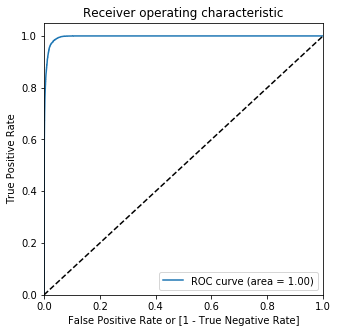

In [245]:
# Predicted
y_train_pred_proba = xgb_adasyn.predict_proba(train_X_adasyn)[:,1]
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

#### <font color='red'>Evaluating over test data</font>

In [184]:
y_pred = xgb_adasyn.predict(test_X)
display_scores(y_test, y_pred)

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.92      0.08        98

    accuracy                           0.96     56962
   macro avg       0.52      0.94      0.53     56962
weighted avg       1.00      0.96      0.98     56962



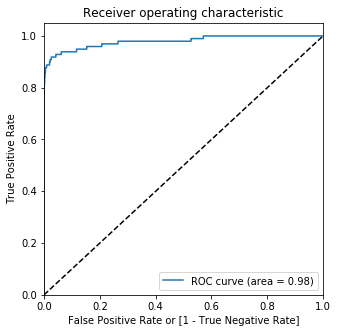

In [185]:
# Predicted
y_test_pred_proba = xgb_adasyn.predict_proba(test_X)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

## <font color='blue'>Summary:XGBoost with ADASYN<font>

Training set

- ROC : 1.0

- Recall(class-1): 0.98


Test set

- ROC : 0.98

- Recall(class-1): 0.92

# <font color='maroon'> Select the oversampling method which shows the best result on a model<font>

We used the following algorithm-
- Logistic Regression
- Decision Tree
- XGBoost

We used below oversampling method with all these algorithms-

- Random Oversampling
- SMOTE
- ADASYN

<font color='brown'>Conclusion:</font>


- We came to conclusion that <font color='red'>XGBoost algorithm with ADASYN</font> is the oversampling technique that performed best. 
- It has a ROC socre of 1.0 on Training data and 0.98 on Test data. 
- It also has a Recall of 0.92 on the Fraudulent class and 0.96 on Non-fraudlent class.
- There is almost no overfitting as performance metrics are comparable on Training and Test set.
- Hence we conclude that <font color='red'>XGBoost with ADASYN </font>is the best combination of algorithm and oversampling method for this usecase. 

# <font color='maroon'> Print the important features of the best model to understand the dataset</font>

Top var = 14
2nd Top var = 4
3rd Top var = 8


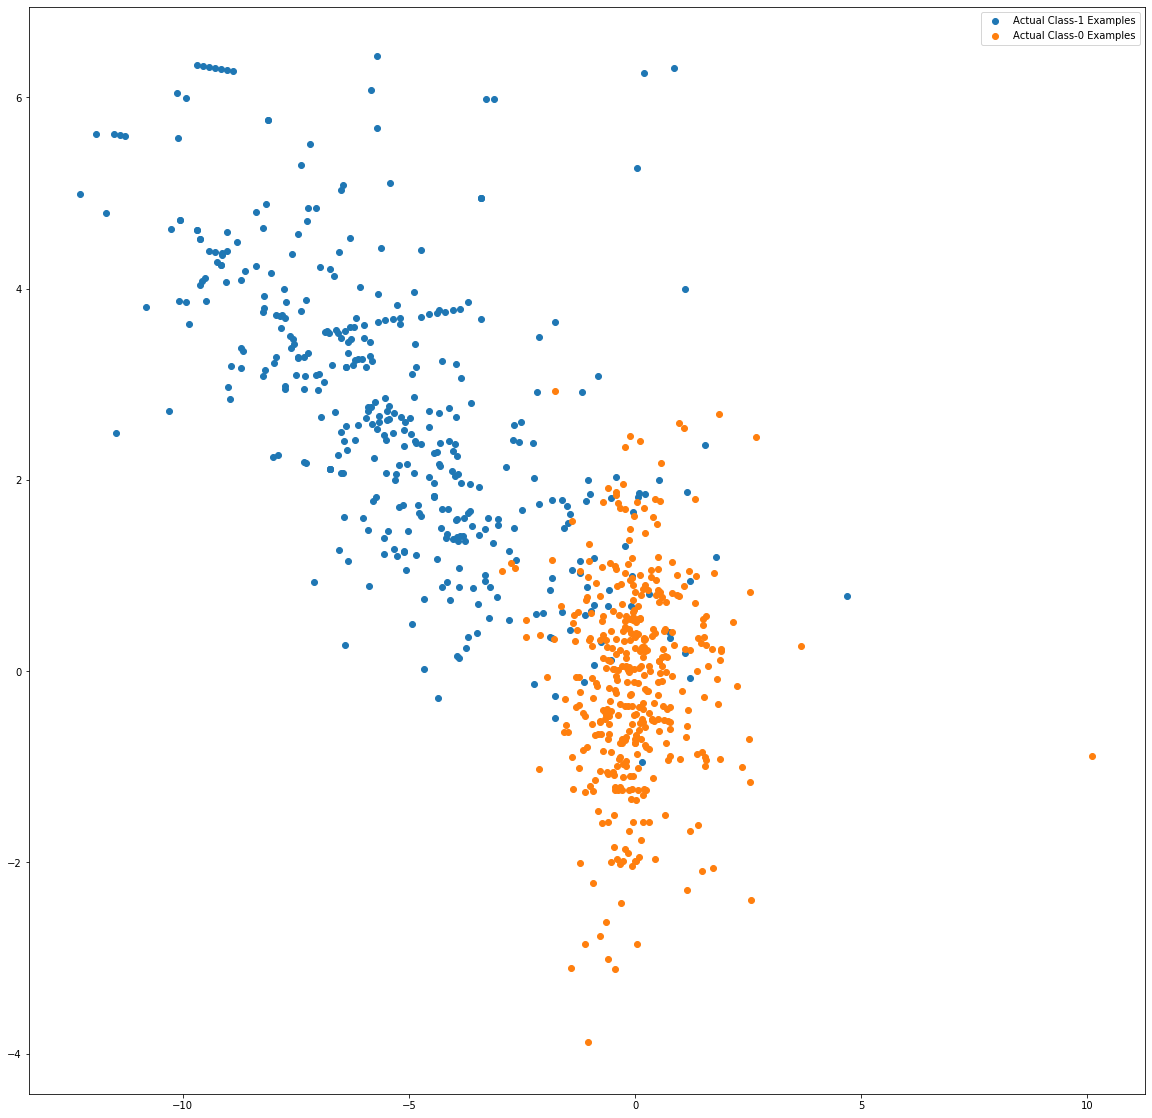

In [243]:
var_imp = []
for i in xgb_adasyn.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgb_adasyn.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgb_adasyn.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgb_adasyn.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgb_adasyn.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb_adasyn.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

# <font color='maroon'>Print the FPR,TPR & select the best threshold from the ROC</font>

In [248]:
print('Train auc =', metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba))
fpr, tpr, thresholds = metrics.roc_curve(y_train_adasyn, y_train_pred_proba )
threshold = thresholds[np.argmax(tpr-fpr)]
print('\nFPR:',fpr)
print('\nTPR:',tpr)
print('\nThreshold:',threshold)

Train auc = 0.9963326457509204

FPR: [0.         0.         0.         ... 0.99996922 0.99997802 1.        ]

TPR: [0.         0.01063493 0.01120207 ... 1.         1.         1.        ]

Threshold: 0.51758754


##### <font color='red'>Observation:</font>
We can see that at the threshold of 0.51 the ROC-AUC value is best at 0.99

# <font color='maroon'>Summary</font>

### <font color='blue'>Strategy and Model Evaluation</font>
- The <font color='red'>ROC curve</font> is used to understand the strength of the model by evaluating the performance of the model at all the classification thresholds. Other metrics depend on the threshold.


- Given the severe consequences that banking institutions face in terms of monetary losses, credibility, and trust due to fraudulent transactions, prioritizing <font color='red'>RECALL</font> becomes a strategic choice to safeguard both the financial well-being of banks and the interests of their customers.


- To save the banks from high-value fraudulent transactions, we have to focus on a high <font color='red'>RECALL</font> in order to detect actual fraudulent transactions.

### <font color='blue'>Class balancing</font>
- The dataset was highly imbalanced with majority of class being of non-Fraudlent transactions. We applied various calss balancing strategies such as Over Sampling,SMOTE and ADASYN to handle this issue.


- The <font color='red'>XGBoost model with ADASYN</font> was our choice since on the Test set it has a <font color='red'>ROC score of 0.98 and a Recall of 0.92 for the Fraudlent class and 0.96 for non-Fraudulent class</font>.

### <font color='blue'>Business considerations</font>
- The XGBoost model with ADASYN will be of good value to business as it will be able to detect most of the potential fraudulent transactions due to its high Recall. 

